In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [118]:
df = pd.read_csv("../data/model_features_stock_data.csv",index_col="Date")
df.head()

,Close,Volume,Target,Rolling_STD_20,Net_result,Close_Open_Ratio,Day_to_Day_Change,MA_20,Close_MA20_Ratio,Rolling_mean_20,Returns
Date,,,,,,,,,,,
2015-01-30,25.998575,334982000,1,0.797319,-0.275164,0.989527,0.985366,24.552077,1.058916,24.552077,-0.014634
2015-02-02,26.324781,250956400,1,0.886254,0.128705,1.004913,1.012547,24.655263,1.067714,24.655263,0.012547
2015-02-03,26.329218,207662800,1,0.922970,0.033286,1.001266,1.000169,24.792846,1.061968,24.792846,0.000169
2015-02-04,26.531157,280598800,1,0.954224,0.235220,1.008945,1.007670,24.940413,1.063782,24.940413,0.007670
2015-02-05,26.720518,168984800,0,1.000353,-0.017821,0.999333,1.007137,25.080918,1.065372,25.080918,0.007137


In [119]:
X = df.drop("Target", axis="columns")
y = df.Target

In [120]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [121]:
log_model = LogisticRegression(fit_intercept=False, class_weight="balanced", C=0.2)

In [122]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X_std[train_idx], X_std[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    log_model.fit(X_train,y_train)
    log_pred = log_model.predict(X_test)

In [123]:
# import tensorflow as tf
# cm = tf.math.confusion_matrix(y_test,log_pred)
# import seaborn as sn
# import matplotlib.pyplot as plt
# # plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True, fmt='d')
# plt.xlabel('Predicted')
# plt.ylabel('Truth')
# plt.show()

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.44      0.52      0.48       207
           1       0.51      0.44      0.47       241

    accuracy                           0.48       448
   macro avg       0.48      0.48      0.48       448
weighted avg       0.48      0.48      0.48       448



In [125]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=3)

In [126]:
for train_idx, test_idx in tscv.split(X):
    rf_X_train, rf_X_test = X_std[train_idx], X_std[test_idx]
    rf_y_train, rf_y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_classifier.fit(rf_X_train,rf_y_train)
    rf_pred = rf_classifier.predict(rf_X_test)

In [127]:
print(classification_report(rf_y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.45      0.77      0.57       207
           1       0.49      0.19      0.27       241

    accuracy                           0.46       448
   macro avg       0.47      0.48      0.42       448
weighted avg       0.47      0.46      0.41       448



In [128]:
rf_classifier.feature_importances_

array([0.09292065, 0.11182985, 0.11614367, 0.10596523, 0.1058025 ,
       0.09371856, 0.08585882, 0.11017201, 0.08366335, 0.09392535])

In [129]:
small_X = X.drop(['Close','Day_to_Day_Change', 'MA_20','Rolling_mean_20','Returns'], axis="columns")

In [130]:
scaler = StandardScaler()
X_std = scaler.fit_transform(small_X)

In [131]:
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X_std[train_idx], X_std[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    log_model.fit(X_train,y_train)
    log_pred = log_model.predict(X_test)

In [132]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.46      0.54      0.50       207
           1       0.54      0.46      0.50       241

    accuracy                           0.50       448
   macro avg       0.50      0.50      0.50       448
weighted avg       0.51      0.50      0.50       448



In [133]:
for train_idx, test_idx in tscv.split(X):
    rf_X_train, rf_X_test = X_std[train_idx], X_std[test_idx]
    rf_y_train, rf_y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_classifier.fit(rf_X_train,rf_y_train)
    rf_pred = rf_classifier.predict(rf_X_test)
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       207
           1       0.52      0.47      0.50       241

    accuracy                           0.48       448
   macro avg       0.48      0.48      0.48       448
weighted avg       0.49      0.48      0.48       448



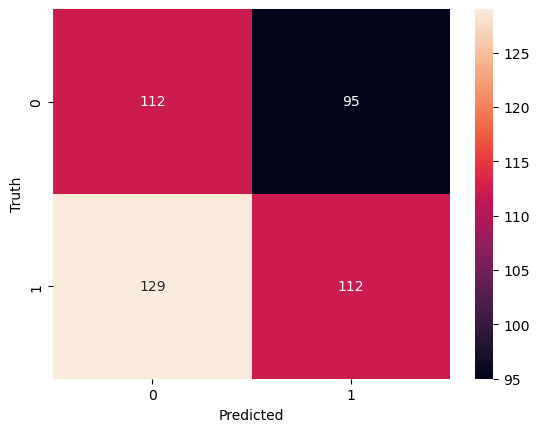

In [134]:
import tensorflow as tf
cm = tf.math.confusion_matrix(y_test,log_pred)
import seaborn as sn
import matplotlib.pyplot as plt
# plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

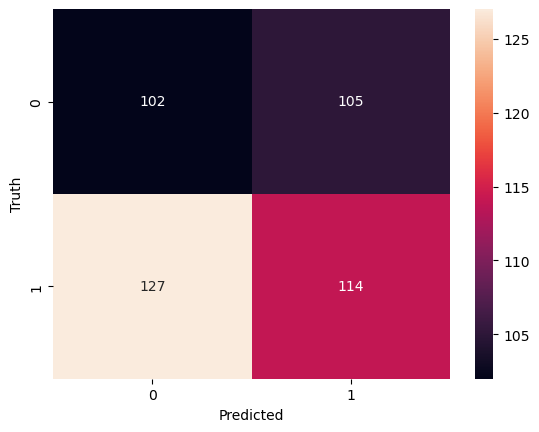

In [135]:
cm = tf.math.confusion_matrix(y_test,rf_pred)
# plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [150]:
import joblib
log_file_path = "../models/Log_model.joblib"
rf_file_path = "../models/rf_model.joblib"

In [154]:
joblib.dump(log_model, log_file_path)

['../models/Log_model.joblib']

In [155]:
joblib.dump(rf_classifier, rf_file_path)

['../models/rf_model.joblib']